In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test)  = cifar10.load_data()

X_train.shape

170500096/170498071 [==============================] - 48s 0us/step


(50000, 32, 32, 3)

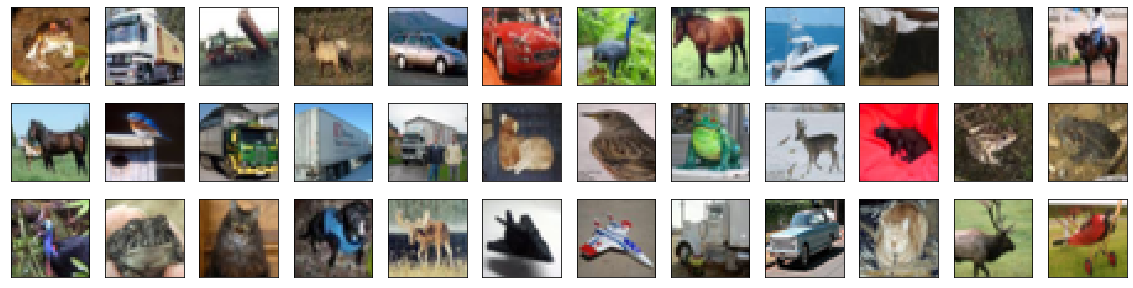

In [6]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])
plt.show()

In [8]:
# Scaler
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
# modeling
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(32,32,3,)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu', ))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu', ))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        784       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [16]:
#loss/optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
hist = model.fit(X_train, y_train, batch_size=150, epochs=1, validation_split=0.2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 78s 2ms/step - loss: 1.6249 - acc: 0.4066 - val_loss: 1.3907 - val_acc: 0.5040


In [18]:
# accuracy 0.4967
score = model.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 8s 754us/step
[1.3900050174713134, 0.4967]


In [19]:
# prediction by X_test
pred = model.predict(X_test)

In [20]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']



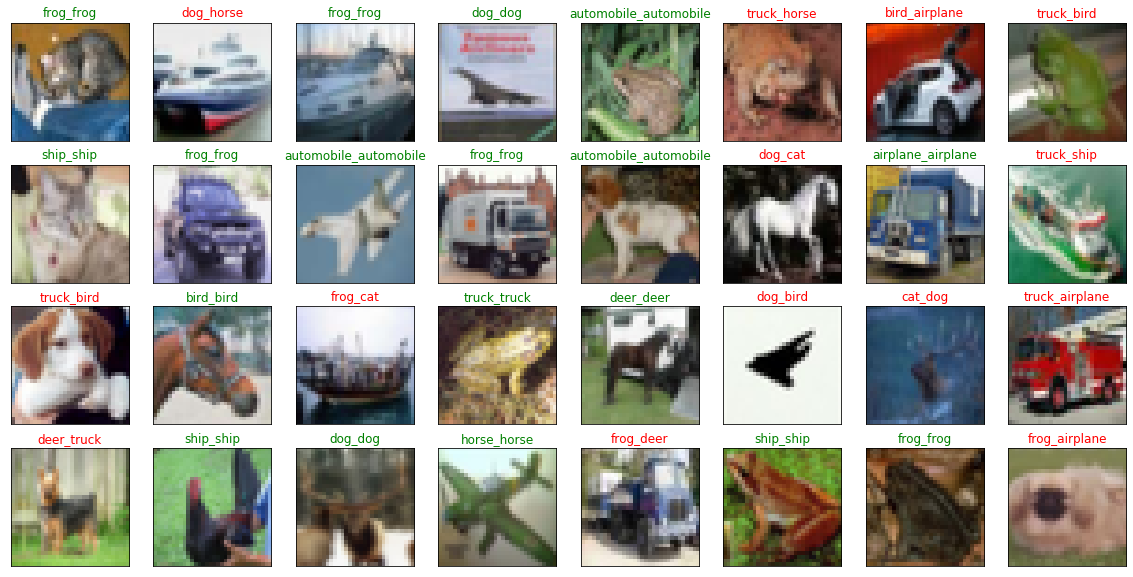

In [24]:
fig = plt.figure(figsize=(20,10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1, xticks=[], yticks=[])
    ax.imshow(X_test[i])

    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(y_test[idx])

    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')

plt.show()
